In [73]:
from regex import I
import requests
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

In [12]:
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

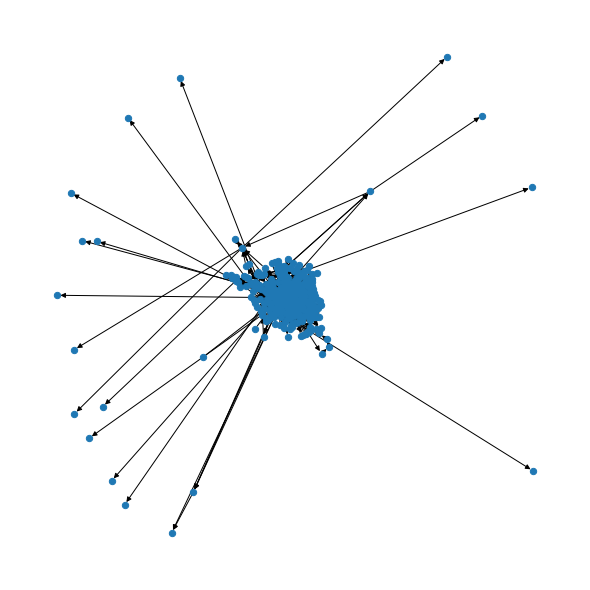

In [17]:

nodes = pd.read_excel('lat_and_long_nodes.xlsx')
edges = pd.read_excel('edges_indexed_updated.xlsx')

graph = nx.DiGraph()

for index, row in nodes.iterrows():
    graph.add_node(row['id'], label=row['Label'], lat=row['lat'], long=row['lng'])


for index, row in edges.iterrows():
    graph.add_edge(row['target'], row['source'], weight=row['weight'])

fig = plt.figure(figsize=(8,8))
nx.draw_spring(graph, node_size=40)

In [18]:
print(graph.number_of_nodes())

print(graph.number_of_edges())

print("G has {0} nodes and {1} edges.".format(len(graph), graph.size()))

513
2297
G has 513 nodes and 2297 edges.


In [28]:
N = len(graph)
L = graph.size()
degrees = [graph.degree(node) for node in graph]
kmin = min(degrees)
kmax = max(degrees)
print(kmin)
print(kmax)

1
389


In [39]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

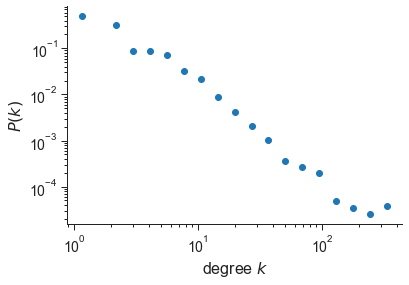

In [40]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [ ]:
#Linear

In [35]:
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

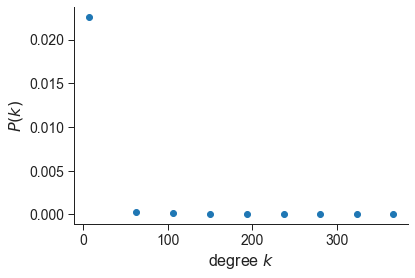

In [36]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [56]:
print(nx.is_strongly_connected(graph))   
print(nx.strongly_connected_components(graph))
print(nx.number_strongly_connected_components(graph))      
 


print(nx.is_weakly_connected(graph))
print(nx.weakly_connected_components(graph)) 
print(nx.number_weakly_connected_components(graph))    


False
<generator object strongly_connected_components at 0x0000028DB8B36200>
116
True
<generator object weakly_connected_components at 0x0000028DB8B36200>
1


513


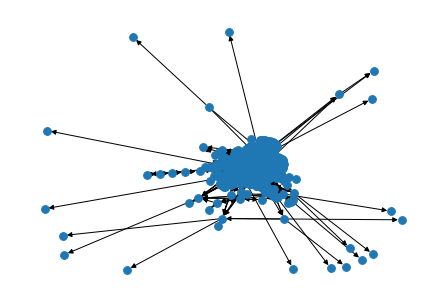

In [198]:
max_strong_component_nodes = list(max(nx.weakly_connected_components(graph), key=len))
max_strong_component_edges = []

sg = nx.DiGraph()
sg.add_nodes_from(max_strong_component)

for i in graph.edges:
    if i[0] in max_strong_component_nodes or i[1] in max_strong_component_nodes:
        max_strong_component_edges.append(i)

print(len(max_strong_component_nodes))
sg.add_edges_from(max_strong_component_edges)
nx.draw_spring(sg, node_size=60)


In [67]:

NB_NODES = len(graph.nodes())
NB_EDGES = len(graph.edges())
P = (2 * NB_EDGES) / ((NB_NODES)*(NB_NODES+1))

print("Number of nodes in the network: ", NB_NODES)
print("Number of edges in the network: ", NB_EDGES)
print("Assuming P to be: ", P)

# Creating a Erdos-Renyi Network
R = nx.erdos_renyi_graph(NB_NODES, P)

Number of nodes in the network:  513
Number of edges in the network:  2297
Assuming P to be:  0.01742250134631867


In [137]:
def plot_ejk(list_of_edges_bw_nodes):
    
    fig = plt.figure()
    plt.gca().invert_yaxis()
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.xaxis.tick_top()
    x, y = list(), list()
    
    for edges_bw_nodes in list_of_edges_bw_nodes:
        x.append(edges_bw_nodes[0])
        y.append(edges_bw_nodes[1])

    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    plt.scatter(x, y, norm=colors.LogNorm(vmin=z.min(), vmax=z.max()), c=z, s=1, cmap='afmhot')
    plt.colorbar()
    
    plt.xlabel("k")
    plt.ylabel("j")
    ax_ = ax.twinx()
    plt.ylabel('e_jk')
    
    plt.show()
    

def plot_knn(k, knn_k):
    
    k=np.array(k)
    avg_k = np.average(k)
    fig = plt.figure()
    ax = plt.gca()
    
    # Binning using a Log Scale
    bin_edges = np.logspace(np.log10(k.min()), np.log10(k.max()), num=50)
    k_nn, _ = np.histogram(knn_k, bins=bin_edges, density=True)
    log_be = np.log10(bin_edges)
    k = 10**((log_be[1:] + log_be[:-1])/2)
    ax.loglog(k, k_nn, marker='o', linestyle='none', label="ANND for the original Graph")
    
    # Random Network's Average Next Neighbor Degree
    neutral_net_knn = np.full(k.shape, np.average(np.square(k)))/avg_k
    ax.plot(k, neutral_net_knn, label="ANND for the random Graph")
    
    # Fitting k_nn = a*(k^u) to the scatter plot to get the value of u
    def func(k, a, u):
        return a*(k**u)
    popt, _ = curve_fit(func, k, k_nn)
    a, u = popt
    print("Value of u is: ", u)
    ax.plot(k, func(k, *popt), label="Value of u = {0}".format(u))
    
    plt.xlabel("k")
    plt.ylabel("k_nn")
    
    plt.show()

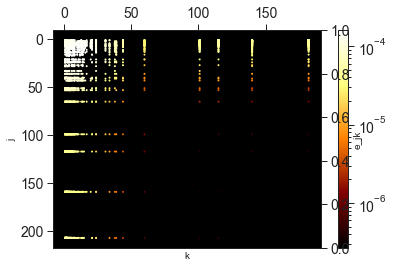

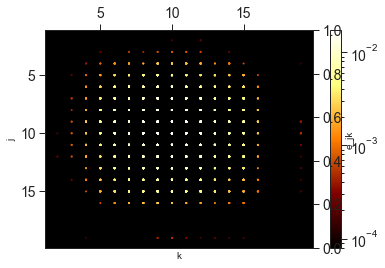

In [138]:
list_of_edges_bw_nodes = list(nx.node_degree_xy(graph))
plot_ejk(list_of_edges_bw_nodes)


# in Graph R
list_of_edges_bw_nodes = list(nx.node_degree_xy(R))
plot_ejk(list_of_edges_bw_nodes)

Value of u is:  -0.6371996549353695


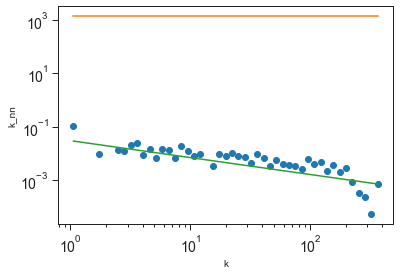

In [139]:
node_and_degrees = list(graph.degree)

k = list()
knn_k = list()

for node, degree in node_and_degrees:
    degrees_of_neighbors = [graph.degree(neighbor) for neighbor in list(graph.neighbors(node))]
    avg_neighbor_degree = sum(degrees_of_neighbors)/degree   
    
#     print(node, degree, avg_neighbor_degree)
    k.append(degree)
    knn_k.append(avg_neighbor_degree)

plot_knn(k, knn_k)

In [140]:
rG = nx.degree_pearson_correlation_coefficient(graph)
rR = nx.degree_pearson_correlation_coefficient(R)

print("Degree Correlation Coefficient for the Original Graph is: ", rG)
print("Degree Correlation Coefficient for the Random Graph is: ", rR)

print(nx.average_clustering(graph))

Degree Correlation Coefficient for the Original Graph is:  -0.39230609186628784
Degree Correlation Coefficient for the Random Graph is:  0.012356188956023754
0.43266052425125096


In [143]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [144]:
G = graph
print(G.number_of_nodes())
print(G.number_of_edges())

513
2297


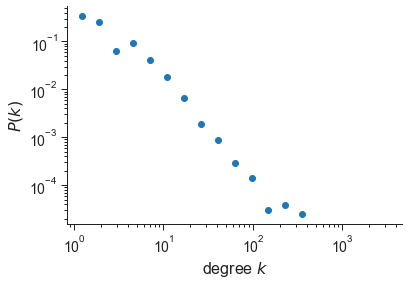

In [145]:
plot_degree_dist(G)

In [146]:
C = np.mean(list(nx.clustering(G).values()))
d = nx.average_shortest_path_length(G,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.4326605242512507
Average Shortest Path:  2.301538894980507


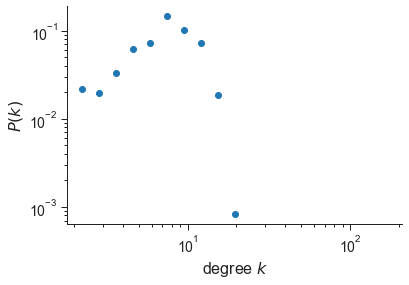

In [147]:
GN = len(G.nodes())
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [148]:
clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.017335590320270242
0.001842968534197547
3.087053788986354
0.02783701396282876


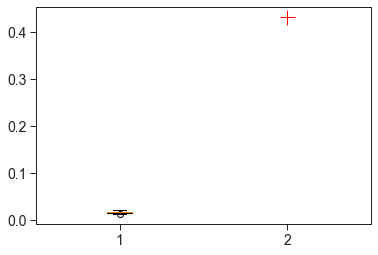

In [149]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

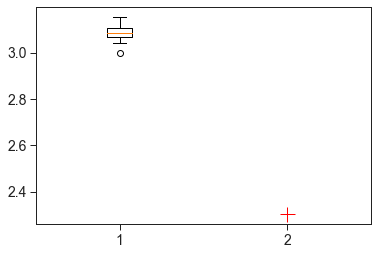

In [150]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

In [151]:
# Calculating metrics for a Degree Preservation Graph

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(G)

NetworkXError: double_edge_swap() not defined for directed graphs.

In [152]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

NetworkXError: double_edge_swap() not defined for directed graphs.

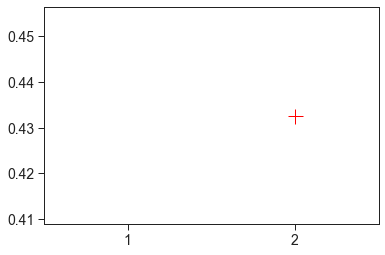

In [153]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_DP)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

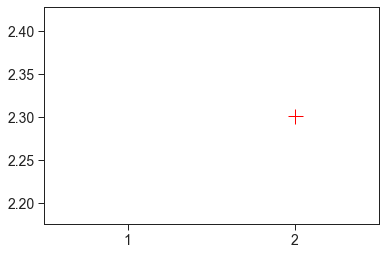

In [154]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_DP)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()